In [29]:
import numpy as np # scientific computing library
import pandas as pd # the data structure and analysis library

In [30]:
#####prerequisite#####
df = pd.read_csv('./lab1.csv')

In [31]:
#a number of important information from the dataset
print(df.info())
#9686 entries, total 28 columns, TargetB  9686 non-null int64, GiftAvgCard36 7906 non-null float64
#with 9686  rows in the whole dataset, there are only 7906 data points in GiftAvgCard36. 
print(df.isnull().any())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9686 entries, 0 to 9685
Data columns (total 28 columns):
TargetB             9686 non-null int64
ID                  9686 non-null int64
TargetD             4843 non-null float64
GiftCnt36           9686 non-null int64
GiftCntAll          9686 non-null int64
GiftCntCard36       9686 non-null int64
GiftCntCardAll      9686 non-null int64
GiftAvgLast         9686 non-null float64
GiftAvg36           9686 non-null float64
GiftAvgAll          9686 non-null float64
GiftAvgCard36       7906 non-null float64
GiftTimeLast        9686 non-null int64
GiftTimeFirst       9686 non-null int64
PromCnt12           9686 non-null int64
PromCnt36           9686 non-null int64
PromCntAll          9686 non-null int64
PromCntCard12       9686 non-null int64
PromCntCard36       9686 non-null int64
PromCntCardAll      9686 non-null int64
StatusCat96NK       9686 non-null object
StatusCatStarAll    9686 non-null int64
DemCluster          9686 non-null int64
De

In [32]:
###2.1 Explore column data
#explore DemAge 
df.DemAge.describe()

#.unique() and .value_counts() functions.
print(df["TargetB"].unique())
print(df["TargetB"].value_counts())
print(df["StatusCat96NK"].unique())
print(df["StatusCat96NK"].value_counts())


[0 1]
1    4843
0    4843
Name: TargetB, dtype: int64
['A' 'S' 'E' 'F' 'N' 'L']
A    5826
S    2365
F     660
N     574
E     227
L      34
Name: StatusCat96NK, dtype: int64


In [33]:
# binning with .value_counts() function.
print(df.DemAge.value_counts())
pd.Series.value_counts(df.DemAge, bins = 10)
#There are only 7279 records in "DemAge" column (from .describe()'s count output)
#while the total number of records in this data set is 9686 


73.0    216
67.0    215
75.0    203
49.0    201
57.0    187
       ... 
2.0       1
20.0      1
4.0       1
18.0      1
15.0      1
Name: DemAge, Length: 79, dtype: int64


(69.6, 78.3]     1437
(60.9, 69.6]     1250
(43.5, 52.2]     1223
(52.2, 60.9]     1043
(78.3, 87.0]      932
(34.8, 43.5]      889
(26.1, 34.8]      342
(17.4, 26.1]       72
(8.7, 17.4]        53
(-0.088, 8.7]      38
Name: DemAge, dtype: int64

In [34]:
#spot data problems in other columns using .describe(), .unique() and .value_counts()?
print(df.StatusCat96NK.describe())
print(df.StatusCat96NK.unique())
print(df.StatusCat96NK.value_counts())
#there are 9686 records in the dataset as many as the observations of the dataset, this column is fine

count     9686
unique       6
top          A
freq      5826
Name: StatusCat96NK, dtype: object
['A' 'S' 'E' 'F' 'N' 'L']
A    5826
S    2365
F     660
N     574
E     227
L      34
Name: StatusCat96NK, dtype: int64


In [35]:
#2.2. Grouping and plotting distributions of columns
print(df['TargetB'].value_counts())


1    4843
0    4843
Name: TargetB, dtype: int64


In [36]:
#groupby TargetB and show the DemAge's mean
print(df.groupby('TargetB').DemAge.mean())

#groupby TargetB and show the DemGender'value_counts
print(df.groupby('TargetB').DemGender.value_counts())

#add normalisation to get the relative frequency
print(df.groupby('TargetB').DemGender.value_counts(normalize=True))

TargetB
0    58.304444
1    59.979070
Name: DemAge, dtype: float64
TargetB  DemGender
0        F            2614
         M            1963
         U             266
1        F            2609
         M            1962
         U             272
Name: DemGender, dtype: int64
TargetB  DemGender
0        F            0.539748
         M            0.405327
         U            0.054925
1        F            0.538716
         M            0.405121
         U            0.056164
Name: DemGender, dtype: float64


In [37]:
#Import libraries with the following command.
import matplotlib
import seaborn as sns

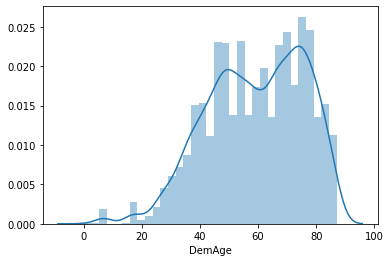

In [38]:
#plot after dropping na
sns.distplot(df.DemAge.dropna())

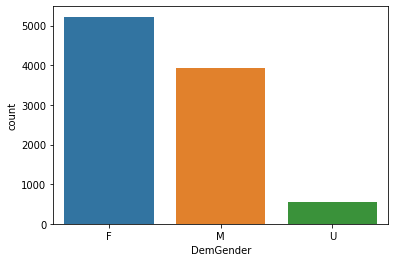

In [39]:
#countplot DemGender
sns.countplot(df.DemGender)

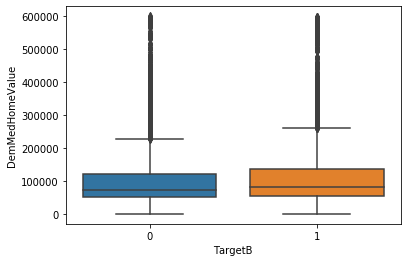

In [40]:
#boxplot with TargetB as X and DemMedHomeValue as y.
sns.boxplot(x = df.TargetB, y = df.DemMedHomeValue)

In [41]:
# 3.1 Setting correct type to variables
df['DemCluster'] = df['DemCluster'].astype(object)
df['DemHomeOwner']=df['DemHomeOwner'].replace({'H': 1,'U':0})

In [42]:
# 3.2. Correcting invalid values
df['DemMedIncome'].unique()

array([    0, 38750, 38942, ..., 50530, 62717, 59813], dtype=int64)

In [43]:
df['DemAge'].unique()

array([nan, 67., 53., 47., 58., 39., 50., 45., 80., 61., 76., 41., 75.,
       59., 51., 31., 54., 70., 42., 65., 81., 38., 56., 69., 52., 33.,
       73., 71., 29., 60., 83., 43., 35., 77., 44., 72., 64., 34., 55.,
       37., 57., 46., 49., 32., 66., 87., 40., 79., 25., 63., 62., 48.,
       68., 86., 23., 27., 74., 78., 85., 26.,  7., 36., 82., 24., 17.,
       30., 84., 21., 28., 22., 19., 16., 14.,  6.,  0.,  2., 20., 18.,
       15.,  4.])

In [44]:
df['DemMedIncome'] = df['DemMedIncome'].replace({0:df['DemMedIncome'].mean()})

In [45]:
df['DemAge'] = df['DemAge'].replace({0:df['DemAge'].mean()})

In [46]:
# 3.3. Imputing Missing Values
df.DemAge.fillna(df.DemAge.mean(), inplace=True)
df['DemMedIncome'].fillna(df['DemMedIncome'].mean(), inplace = True)
df['GiftAvgCard36'].fillna(df['GiftAvgCard36'].mean(), inplace = True)

In [47]:
# 3.4. Dropping Unnecessary Variables
df = df.drop(['ID'], axis=1)
df = df.drop(['TargetD'], axis=1)

In [48]:
# 3.5. Formatting Categorical Variable
df.DemGender = df.DemGender.astype('category')

In [49]:
# 3.6. Wrapping up
df.to_csv("./lab2.csv", index = None)    

In [50]:
df.head()

,TargetB,GiftCnt36,GiftCntAll,GiftCntCard36,GiftCntCardAll,GiftAvgLast,GiftAvg36,GiftAvgAll,GiftAvgCard36,GiftTimeLast,...,PromCntCardAll,StatusCat96NK,StatusCatStarAll,DemCluster,DemAge,DemGender,DemHomeOwner,DemMedHomeValue,DemPctVeterans,DemMedIncome
0,0,2,4,1,3,17.0,13.50,9.25,17.000000,21,...,13,A,0,0,59.158971,F,0,0,0,40491.444249
1,0,1,8,0,3,20.0,20.00,15.88,14.224431,26,...,24,A,0,23,67.000000,F,0,186800,85,40491.444249
2,1,6,41,3,20,6.0,5.17,3.73,5.000000,18,...,22,S,1,0,59.158971,M,0,87600,36,38750.000000
3,1,3,12,3,8,10.0,8.67,8.50,8.670000,9,...,16,E,1,0,59.158971,M,0,139200,27,38942.000000
4,0,1,1,1,1,20.0,20.00,20.00,20.000000,21,...,6,F,0,35,53.000000,M,0,168100,37,71509.000000


In [80]:
### 2. data partition###
#independent variables
inputs = df.drop("TargetB", axis = "columns")
#dependent variable
target = df["TargetB"]

#split the train set and test set and set the ramdom_state to 0
from sklearn.model_selection import train_test_split
inputs_train, inputs_test, target_train, target_test = train_test_split(inputs, target, test_size = 0.2, random_state = 0)

In [81]:
### a)describe the inputs_train, inputs_test, target_train, target_test
#inputs_train
inputs_train

,GiftCnt36,GiftCntAll,GiftCntCard36,GiftCntCardAll,GiftAvgLast,GiftAvg36,GiftAvgAll,GiftAvgCard36,GiftTimeLast,GiftTimeFirst,...,PromCntCardAll,StatusCat96NK,StatusCatStarAll,DemCluster,DemAge,DemGender,DemHomeOwner,DemMedHomeValue,DemPctVeterans,DemMedIncome
7683,3,12,1,8,10.0,7.00,5.33,10.000000,18,126,...,27,S,1,17,79.0,F,1,192200,37,50777.000000
4706,13,32,8,15,6.0,7.23,5.94,6.630000,17,89,...,26,S,1,45,34.0,F,0,38100,19,37308.000000
1127,2,14,0,3,10.0,10.00,7.50,14.224431,15,113,...,26,S,1,12,76.0,M,1,84100,28,53515.000000
4639,2,3,2,2,15.0,16.00,15.67,16.000000,5,29,...,11,A,0,49,49.0,M,1,43800,32,49688.000000
2793,1,6,0,3,15.0,15.00,12.83,14.224431,7,57,...,17,E,0,40,47.0,M,1,72400,39,64129.000000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7891,1,4,1,3,20.0,20.00,12.50,20.000000,24,53,...,18,A,0,1,81.0,F,1,218400,15,65398.000000
9225,4,24,4,16,10.0,10.00,6.38,10.000000,24,129,...,30,A,1,23,72.0,F,0,106000,39,40491.444249
4859,3,27,2,16,10.0,10.00,8.44,10.000000,17,125,...,29,A,1,24,37.0,F,0,81600,36,49134.000000
3264,3,17,2,7,11.0,11.00,7.76,11.000000,16,110,...,24,A,1,45,75.0,F,0,39900,30,51208.000000


In [82]:
#inputs_test
inputs_test

,GiftCnt36,GiftCntAll,GiftCntCard36,GiftCntCardAll,GiftAvgLast,GiftAvg36,GiftAvgAll,GiftAvgCard36,GiftTimeLast,GiftTimeFirst,...,PromCntCardAll,StatusCat96NK,StatusCatStarAll,DemCluster,DemAge,DemGender,DemHomeOwner,DemMedHomeValue,DemPctVeterans,DemMedIncome
462,3,3,1,1,10.0,10.00,10.00,10.000000,18,24,...,9,N,0,41,59.158971,M,0,51400,28,45878.000000
5817,3,7,2,3,20.0,16.67,16.43,20.000000,21,45,...,16,A,0,12,46.000000,M,1,67100,10,57340.000000
9083,2,2,0,0,15.0,12.50,12.50,14.224431,18,28,...,9,A,0,34,59.158971,F,0,61400,45,40491.444249
7968,1,1,1,1,15.0,15.00,15.00,15.000000,17,17,...,5,F,0,13,80.000000,M,1,366800,44,70882.000000
5570,3,10,1,5,19.0,18.00,11.60,18.000000,18,108,...,32,A,1,36,60.000000,U,0,63200,27,40491.444249
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8743,4,30,2,16,8.0,8.50,6.80,8.000000,17,129,...,33,S,1,46,17.000000,F,1,171900,27,52532.000000
326,2,39,1,11,100.0,162.50,96.79,125.000000,6,111,...,32,A,1,24,79.000000,F,0,93800,33,65734.000000
226,4,12,2,7,10.0,8.75,10.83,7.500000,18,53,...,9,E,0,40,59.158971,U,0,95800,35,40491.444249
463,1,2,0,0,20.0,20.00,20.00,14.224431,19,20,...,7,N,0,50,59.158971,F,0,56700,18,37644.000000


In [83]:
#target_train
target_train

7683    0
4706    0
1127    0
4639    0
2793    0
       ..
7891    1
9225    1
4859    0
3264    1
2732    1
Name: TargetB, Length: 7748, dtype: int64

In [84]:
#target_test
target_test

462     1
5817    0
9083    0
7968    1
5570    0
       ..
8743    0
326     0
226     1
463     0
3883    0
Name: TargetB, Length: 1938, dtype: int64

In [ ]:
###b) purposes:
# train set: build and tarin the model
# validation set: valide the model and prevent the model being overfitting
# test set: test the model and evaluate the performance of the model

In [ ]:
###c) What is k-fold cross validation?
# 1.Shuffle the dataset randomly.
# 2.Split the dataset into k groups
# 3.For each unique group:
#      1.Take the group as a hold out or test data set
#      2.Take the remaining groups as a training data set
#      3.Fit a model on the training set and evaluate it on the test set
#      4.Retain the evaluation score and discard the model
# 4.Summarize the skill of the model using the sample of model evaluation scores

In [ ]:
###d) What is the advantage and disadvantage of k-fold CV compared to normal training/test/validation method?
# Advantages: takes care of both drawbacks of validation-set methods as well as LOOCV.
# Disadvantages: (1) Some what higher bias than LOOCV due to smaller training set for each iteration (but smaller bias than Validation-set method due to larger training set than VS.)

In [96]:
### 3. Decision tree ###

#set the label encoder
from sklearn.preprocessing import LabelEncoder
le_StatusCat96NK = LabelEncoder()
le_DemGender = LabelEncoder()
inputs_train["StatusCat96NK"] = le_StatusCat96NK.fit_transform(inputs_train["StatusCat96NK"])
inputs_train["DemGender"] = le_StatusCat96NK.fit_transform(inputs_train["DemGender"])

D:\Applications\Anaconda\lib\site-packages\ipykernel_launcher.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  import sys
D:\Applications\Anaconda\lib\site-packages\ipykernel_launcher.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


In [97]:
# a)import and build a decision tree classifier
# b) alread set the random_state to 0 in data partition
from sklearn import tree
model = tree.DecisionTreeClassifier()
model.fit(inputs_train, target_train)

DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=None,
                       max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort=False,
                       random_state=None, splitter='best')

In [103]:
#evaluate the model
le_StatusCat96NK = LabelEncoder()
le_DemGender = LabelEncoder()
inputs_test["StatusCat96NK"] = le_StatusCat96NK.fit_transform(inputs_test["StatusCat96NK"])
inputs_test["DemGender"] = le_StatusCat96NK.fit_transform(inputs_test["DemGender"])
#c) Fit it against the training data.
model.score(inputs_train, target_train)
# d) What is the performance of the model against training data? 
# the performance of the model against training data is 100%

D:\Applications\Anaconda\lib\site-packages\ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  after removing the cwd from sys.path.
D:\Applications\Anaconda\lib\site-packages\ipykernel_launcher.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """


1.0

In [104]:
# e) How about against the test data? Do you see any indication of overfitting here?
# the score of the model against the test data is 0.5196078431372549, it's obvious that this model is overfitting
# because this model could fit the train set perfectly, but cannot fit the test set(stange dataset)
model.score(inputs_test, target_test)

0.5196078431372549

In [ ]:
# f) What are the top 5 most important features in this model?

In [ ]:
# g) Visualise the structure of your decision tree. Can you identify characteristics of important features?